<a href="https://colab.research.google.com/github/lkjhgfdbf3/AI-15-Section2-Project/blob/main/src/section2_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_inst = pd.read_csv("/content/Installation_Status.csv",encoding='utf-8')
df_iss = pd.read_csv("/content/Issuance_information.csv",encoding='utf-8')

In [ ]:
df_inst

,Unnamed: 0,관리번호,관리기관명,발급기명,설치장소주소,설치장소상세위치,평일운영시작시각,평일운영종료시각,장애인편의발급기형태,시각장애인용키패드,...,점자라벨부착,이어폰소켓,촉각(전자)모니터,화면확대기능,휠체어사용자조작,설치장소위치,문서발급횟수,갱신 연도,갱신 월,갱신 일
0,0,101,서울특별시 종로구,종로구청 부동산정보과1,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",2층 부동산정보과,900,1800,일반(장애인 편의기능 일부 포함),제공,...,부착,제공,미제공,제공,가능,시군구,76.0,2021,3,24
1,1,102,서울특별시 종로구,종로구청 부동산정보과2,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",2층 부동산정보과,900,1800,일반(장애인 편의기능 일부 포함),제공,...,부착,제공,미제공,제공,가능,시군구,76.0,2021,3,24
2,2,103,서울특별시 종로구,종로구청 상황실,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",종로구청 상황실,0,2400,장애인겸용,제공,...,부착,제공,제공,제공,가능,시군구,75.0,2022,8,3
3,3,403,서울특별시 종로구,종로5-6가동 주민센터,서울특별시 종로구 종로35가길 19(효제동),2층 민원실 입구,900,1800,장애인겸용,제공,...,부착,제공,미제공,제공,가능,읍면동,75.0,2021,4,28
4,4,502,서울특별시 종로구,종로구청 민원실1,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",민원실 외부,900,1800,장애인겸용,제공,...,부착,제공,미제공,제공,가능,시군구,76.0,2022,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,5087,419,제주특별자치도 서귀포시,서홍동 무인민원발급기,제주특별자치도 서귀포시 중앙로 125(서홍동)[제주특별자치도 서귀포시 서홍동 397...,주민센터 입구 좌측,0,2400,일반(장애인 편의기능 일부 포함),제공,...,부착,제공,미제공,제공,가능,읍면동,75.0,2022,7,21
5088,5088,420,제주특별자치도 서귀포시,중문동주민센터 입구,제주특별자치도 서귀포시 1100로 30(중문동)[제주특별자치도 서귀포시 중문동 18...,중문동주민센터 입구,0,2400,장애인겸용,제공,...,부착,제공,제공,제공,가능,읍면동,76.0,2022,7,21
5089,5089,421,제주특별자치도 서귀포시,영천동 주민센터,"제주특별자치도 서귀포시 토평로 15, 영천동주민센터 (토평동)",현관 우측 옥외부스,0,2400,장애인겸용,제공,...,부착,제공,제공,제공,가능,읍면동,75.0,2022,7,21
5090,5090,422,제주특별자치도 서귀포시,남원읍 위미문화의집,"제주특별자치도 서귀포시 남원읍 태위로 105, 위미문화의집",위미문화의 집 내,0,2400,장애인겸용,제공,...,부착,제공,제공,제공,가능,읍면동,75.0,2022,3,26


In [ ]:
df_inst['평일운영시작_hour']=df_inst.평일운영시작시각 / 100
df_inst['평일운영시작_min']=df_inst.평일운영시작시각 % 100
df_inst['평일운영종료_hour']=df_inst.평일운영종료시각 / 100
df_inst['평일운영종료_min']=df_inst.평일운영종료시각 % 100

In [ ]:
df_inst=df_inst.drop(['평일운영시작시각','평일운영종료시각'],axis=1)

In [ ]:
cols = ['문서발급횟수','평일운영시작_hour','평일운영종료_hour']
for col in cols:
   df_inst[col] = df_inst[col].apply(lambda x: int(x) if x == x else "")

In [ ]:
df_iss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369954 entries, 0 to 369953
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  369954 non-null  int64 
 1   시군구명        369954 non-null  object
 2   발급기번호       369954 non-null  int64 
 3   초기메뉴명       369954 non-null  object
 4   민원사무분류명     369954 non-null  object
 5   데이터갱신구분     369954 non-null  object
 6   갱신 연도       369954 non-null  int64 
 7   갱신 월        369954 non-null  int64 
 8   갱신 일        369954 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 25.4+ MB


In [ ]:
df_iss.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_iss.head(5)

,시군구명,발급기번호,초기메뉴명,민원사무분류명,데이터갱신구분,갱신 연도,갱신 월,갱신 일
0,서울특별시 종로구,101,보건복지,한부모가족증명서,U,2020,10,13
1,서울특별시 종로구,101,국세증명,납세증명서(국세완납증명),U,2020,10,13
2,서울특별시 종로구,101,국세증명,사업자등록증명,U,2020,10,13
3,서울특별시 종로구,101,국세증명,휴업사실증명,U,2020,10,13
4,서울특별시 종로구,101,국세증명,납부내역증명,U,2020,10,13


In [ ]:
df_iss.iloc[0:2,9:22]

""
0
1


## 시각장애인 관련 컬럼
시각장애인용키패드 \\
시각장애인용음성안내 \\
점자라벨부착 \\
촉각(전자)모니터 \\
화면확대기능 \\

## 청각장애인 관련 컬럼
청각장애인용화면안내 \\
이어폰소켓 \\

## 휠체어 이용자 관련 컬럼
휠체어사용자조작 \\



## 목표
- 행정안전부에서 무인민원발급기 추가설치 및 운영 예산 마련을 위해
사용량이 적은 무인민원발급기 제거하려한다.

## 가설설정
- 장애인도 쉽게 무인민원발급기를 사용할 수 있는 기능을 갖췄는가? (기능활성화가 되지않은 기계확인)
- 무인민원발급기의 설치 위치가 접근성이나 인구 유동성을 고려하여 설치되어있는가?

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import matplotlib
import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

Linux


In [ ]:
df_iss['갱신 연도'].value_counts()

2020    300974
2021     35373
2022     33084
2019       523
Name: 갱신 연도, dtype: int64

In [ ]:
year_list = []
val_list = []

for year, val in  df_iss['갱신 연도'].value_counts().items():
  year_list.append(year)
  val_list.append(val)

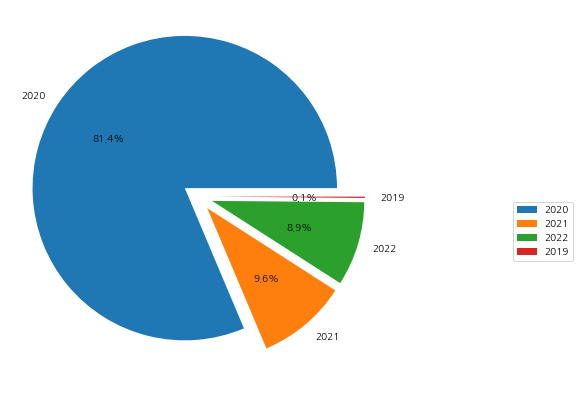

In [ ]:
plt.figure(figsize=(9,7))
exp=[0.1,0.1,0.1,0.1]
plt.pie(val_list, labels=year_list,explode=exp,autopct='%.1f%%')
plt.legend(year_list,bbox_to_anchor=(1.5,0.5))
plt.show()

In [ ]:
df_inst

,Unnamed: 0,관리번호,관리기관명,발급기명,설치장소주소,설치장소상세위치,장애인편의발급기형태,시각장애인용키패드,시각장애인용음성안내,청각장애인용화면안내,...,휠체어사용자조작,설치장소위치,문서발급횟수,갱신 연도,갱신 월,갱신 일,평일운영시작_hour,평일운영시작_min,평일운영종료_hour,평일운영종료_min
0,0,101,서울특별시 종로구,종로구청 부동산정보과1,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",2층 부동산정보과,일반(장애인 편의기능 일부 포함),제공,제공,제공,...,가능,시군구,76,2021,3,24,9,0,18,0
1,1,102,서울특별시 종로구,종로구청 부동산정보과2,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",2층 부동산정보과,일반(장애인 편의기능 일부 포함),제공,제공,제공,...,가능,시군구,76,2021,3,24,9,0,18,0
2,2,103,서울특별시 종로구,종로구청 상황실,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",종로구청 상황실,장애인겸용,제공,제공,제공,...,가능,시군구,75,2022,8,3,0,0,24,0
3,3,403,서울특별시 종로구,종로5-6가동 주민센터,서울특별시 종로구 종로35가길 19(효제동),2층 민원실 입구,장애인겸용,제공,제공,제공,...,가능,읍면동,75,2021,4,28,9,0,18,0
4,4,502,서울특별시 종로구,종로구청 민원실1,"서울특별시 종로구 종로1길 36, 대림빌딩 (수송동)",민원실 외부,장애인겸용,제공,제공,제공,...,가능,시군구,76,2022,8,3,9,0,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,5087,419,제주특별자치도 서귀포시,서홍동 무인민원발급기,제주특별자치도 서귀포시 중앙로 125(서홍동)[제주특별자치도 서귀포시 서홍동 397...,주민센터 입구 좌측,일반(장애인 편의기능 일부 포함),제공,제공,제공,...,가능,읍면동,75,2022,7,21,0,0,24,0
5088,5088,420,제주특별자치도 서귀포시,중문동주민센터 입구,제주특별자치도 서귀포시 1100로 30(중문동)[제주특별자치도 서귀포시 중문동 18...,중문동주민센터 입구,장애인겸용,제공,제공,제공,...,가능,읍면동,76,2022,7,21,0,0,24,0
5089,5089,421,제주특별자치도 서귀포시,영천동 주민센터,"제주특별자치도 서귀포시 토평로 15, 영천동주민센터 (토평동)",현관 우측 옥외부스,장애인겸용,제공,제공,제공,...,가능,읍면동,75,2022,7,21,0,0,24,0
5090,5090,422,제주특별자치도 서귀포시,남원읍 위미문화의집,"제주특별자치도 서귀포시 남원읍 태위로 105, 위미문화의집",위미문화의 집 내,장애인겸용,제공,제공,제공,...,가능,읍면동,75,2022,3,26,0,0,24,0


In [ ]:
print(df_inst.query('시각장애인용키패드=="제공"').shape[0] / df_inst.shape[0])
print(df_inst.query('시각장애인용키패드=="미제공"').shape[0] / df_inst.shape[0])

0.9703456402199528
0.029654359780047133


In [ ]:
print(df_inst.query('시각장애인용음성안내=="제공"').shape[0] / df_inst.shape[0])
print(df_inst.query('시각장애인용음성안내=="미제공"').shape[0] / df_inst.shape[0])

0.9768263943440691
0.023173605655930872


In [ ]:
print(df_inst.query('점자라벨부착=="부착"').shape[0] / df_inst.shape[0])
print(df_inst.query('점자라벨부착=="미부착"').shape[0] / df_inst.shape[0])

0.9695600942655145
0.03043990573448547


In [ ]:
print(df_inst.query('화면확대기능=="제공"').shape[0] / df_inst.shape[0])
print(df_inst.query('화면확대기능=="미제공"').shape[0] / df_inst.shape[0])

0.9738805970149254
0.026119402985074626


In [ ]:
df_inst.rename(columns={'촉각(전자)모니터':'촉각모니터'}, inplace=True)

In [ ]:
print(df_inst.query('촉각모니터=="제공"').shape[0] / df_inst.shape[0])
print(df_inst.query('촉각모니터=="미제공"').shape[0] / df_inst.shape[0])

0.27965435978004716
0.7203456402199528


Text(0, 0.5, '비율')

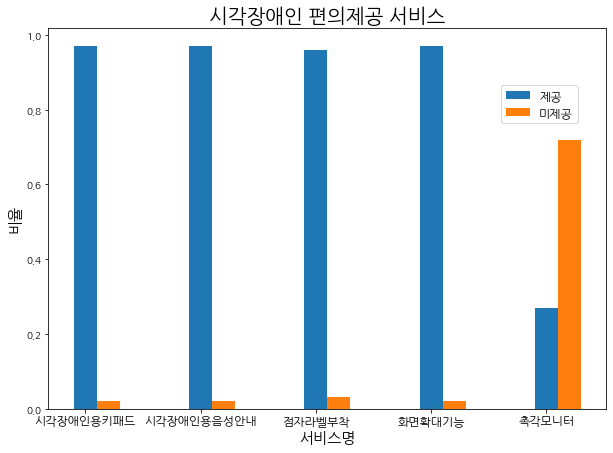

In [ ]:
plt.figure(figsize=(10,7))
service = ['시각장애인용키패드','시각장애인용음성안내','점자라벨부착','화면확대기능','촉각모니터']
index = np.arange(len(service))
provided = [0.97,0.97,0.96,0.97,0.27]
not_provided = [0.02,0.02,0.03,0.02,0.72]
bar_width = 0.2
plt.bar(index,provided,bar_width,label='제공')
plt.bar(index+bar_width,not_provided,bar_width,label='미제공')
plt.title("시각장애인 편의제공 서비스",fontdict={'fontsize':20})
plt.xticks(index,service)
plt.xticks(fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(0.8,0.8),prop={'size':12})
plt.xlabel('서비스명',fontsize=15)
plt.ylabel('비율',fontsize=15)

In [ ]:
s=df_inst.loc[df_inst['촉각모니터']=='미제공']

In [ ]:
s.shape

(3668, 24)

In [ ]:
k = s.loc[s['갱신 연도']==2019]
k.loc[:,['시각장애인용키패드','시각장애인용음성안내','점자라벨부착','화면확대기능','촉각모니터']]

,시각장애인용키패드,시각장애인용음성안내,점자라벨부착,화면확대기능,촉각모니터
1064,미제공,미제공,미부착,미제공,미제공
1065,미제공,미제공,미부착,미제공,미제공
1066,미제공,미제공,미부착,미제공,미제공
1067,미제공,미제공,미부착,미제공,미제공
1068,미제공,미제공,미부착,미제공,미제공


In [ ]:
k2 = s.loc[s['갱신 연도']==2020]
k2.loc[:,['시각장애인용키패드','시각장애인용음성안내','점자라벨부착','화면확대기능','촉각모니터']]

,시각장애인용키패드,시각장애인용음성안내,점자라벨부착,화면확대기능,촉각모니터
156,제공,제공,부착,제공,미제공
519,제공,제공,부착,제공,미제공
525,제공,제공,부착,제공,미제공
1060,제공,제공,부착,제공,미제공
2506,제공,제공,부착,제공,미제공
3050,제공,제공,부착,제공,미제공
3150,제공,제공,부착,제공,미제공
3153,제공,제공,부착,제공,미제공
3164,제공,제공,부착,제공,미제공
3173,제공,제공,부착,제공,미제공


In [ ]:
k3 = s.loc[s['갱신 연도']==2021]
k3.loc[:,['시각장애인용키패드','시각장애인용음성안내','점자라벨부착','화면확대기능','촉각모니터']]
k3.query(('시각장애인용키패드=="미제공"') and ('시각장애인용음성안내=="미제공"') and ('점자라벨부착=="미부착"') and ('화면확대기능=="미제공"'))

,Unnamed: 0,관리번호,관리기관명,발급기명,설치장소주소,설치장소상세위치,장애인편의발급기형태,시각장애인용키패드,시각장애인용음성안내,청각장애인용화면안내,...,휠체어사용자조작,설치장소위치,문서발급횟수,갱신 연도,갱신 월,갱신 일,평일운영시작_hour,평일운영시작_min,평일운영종료_hour,평일운영종료_min
1046,1046,503,인천광역시 중구,영종동 행정복지센터,인천광역시 중구 운남서로 100(운남동),영종동 주민센터 입구,일반(장애인 편의기능 일부 포함),제공,미제공,제공,...,가능,읍면동,76,2021,11,17,0,0,24,0
1078,1078,102,인천광역시 미추홀구,용현5동 행정복지센터,인천광역시 미추홀구 토금북로 60(용현동),용현5동 행정복지센터 내,일반,미제공,미제공,미제공,...,가능,읍면동,74,2021,9,29,9,0,18,0
2244,2244,401,경기도 군포시,대야미역,경기도 군포시 대야1로 28(대야미동)[233번지 4호],역사 내 매표소 옆,일반,미제공,미제공,미제공,...,불가능,지하철,65,2021,9,29,7,0,21,0
2245,2245,402,경기도 군포시,당정역,경기도 군포시 당정역로 91(당정동)[938번지],역사 통로 출입구 옆,일반,미제공,미제공,미제공,...,불가능,지하철,64,2021,9,1,7,0,21,0
2246,2246,403,경기도 군포시,부곡지구 2단지,"경기도 군포시 송부로291번길 29-0, 206동 1층 (부곡동)[경기도 군포시 부...",2단지 관리사무소 옆 복지회관,일반,미제공,미제공,미제공,...,불가능,아파트,64,2021,9,1,7,0,21,0
2247,2247,404,경기도 군포시,군포문화원,경기도 군포시 한세로56번길 12(당정동)[969번지 2호],문화원 내 현관,일반,미제공,미제공,미제공,...,불가능,문화복지센터,76,2021,9,1,7,0,21,0
2958,2958,421,충청남도 천안시,갤러리아 센터시티,"충청남도 천안시 서북구 공원로 227, 8층 (불당동, 갤러리아백화점)[충청남도 천...",천안시 홍보관 내,일반(장애인 편의기능 일부 포함),제공,미제공,제공,...,가능,백화점,64,2021,10,8,10,30,20,0


In [ ]:
k4 = s.loc[s['갱신 연도']==2022]
k4.loc[:,['시각장애인용키패드','시각장애인용음성안내','점자라벨부착','화면확대기능','촉각모니터']]
k3.query(('시각장애인용키패드=="미제공"') and ('시각장애인용음성안내=="미제공"') and ('점자라벨부착=="미부착"') and ('화면확대기능=="미제공"'))

,Unnamed: 0,관리번호,관리기관명,발급기명,설치장소주소,설치장소상세위치,장애인편의발급기형태,시각장애인용키패드,시각장애인용음성안내,청각장애인용화면안내,...,휠체어사용자조작,설치장소위치,문서발급횟수,갱신 연도,갱신 월,갱신 일,평일운영시작_hour,평일운영시작_min,평일운영종료_hour,평일운영종료_min
1046,1046,503,인천광역시 중구,영종동 행정복지센터,인천광역시 중구 운남서로 100(운남동),영종동 주민센터 입구,일반(장애인 편의기능 일부 포함),제공,미제공,제공,...,가능,읍면동,76,2021,11,17,0,0,24,0
1078,1078,102,인천광역시 미추홀구,용현5동 행정복지센터,인천광역시 미추홀구 토금북로 60(용현동),용현5동 행정복지센터 내,일반,미제공,미제공,미제공,...,가능,읍면동,74,2021,9,29,9,0,18,0
2244,2244,401,경기도 군포시,대야미역,경기도 군포시 대야1로 28(대야미동)[233번지 4호],역사 내 매표소 옆,일반,미제공,미제공,미제공,...,불가능,지하철,65,2021,9,29,7,0,21,0
2245,2245,402,경기도 군포시,당정역,경기도 군포시 당정역로 91(당정동)[938번지],역사 통로 출입구 옆,일반,미제공,미제공,미제공,...,불가능,지하철,64,2021,9,1,7,0,21,0
2246,2246,403,경기도 군포시,부곡지구 2단지,"경기도 군포시 송부로291번길 29-0, 206동 1층 (부곡동)[경기도 군포시 부...",2단지 관리사무소 옆 복지회관,일반,미제공,미제공,미제공,...,불가능,아파트,64,2021,9,1,7,0,21,0
2247,2247,404,경기도 군포시,군포문화원,경기도 군포시 한세로56번길 12(당정동)[969번지 2호],문화원 내 현관,일반,미제공,미제공,미제공,...,불가능,문화복지센터,76,2021,9,1,7,0,21,0
2958,2958,421,충청남도 천안시,갤러리아 센터시티,"충청남도 천안시 서북구 공원로 227, 8층 (불당동, 갤러리아백화점)[충청남도 천...",천안시 홍보관 내,일반(장애인 편의기능 일부 포함),제공,미제공,제공,...,가능,백화점,64,2021,10,8,10,30,20,0


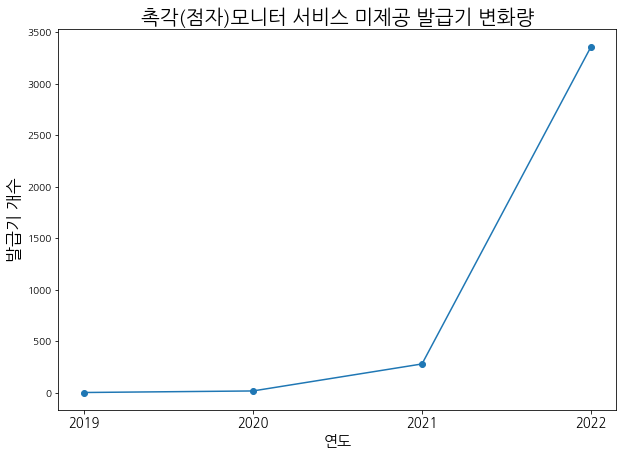

In [ ]:
plt.figure(figsize=(10,7))
x_values = ['2019', '2020', '2021', '2022']
y_values = [5, 20, 282, 3361]
plt.plot(x_values, y_values,marker='o')	
plt.xlabel('연도',fontsize=15)
plt.ylabel('발급기 개수',fontsize=17)
plt.xticks(fontsize=13)
plt.title('촉각(점자)모니터 서비스 미제공 발급기 변화량',fontdict={'fontsize':20})
plt.show()

In [ ]:
print(df_inst.query('청각장애인용화면안내=="제공"').shape[0] / df_inst.shape[0])
print(df_inst.query('청각장애인용화면안내=="미제공"').shape[0] / df_inst.shape[0])

0.9848782403770621
0.015121759622937941


In [ ]:
print(df_inst.query('이어폰소켓=="제공"').shape[0] / df_inst.shape[0])
print(df_inst.query('이어폰소켓=="미제공"').shape[0] / df_inst.shape[0])

0.9395129615082483
0.060487038491751764


Text(0, 0.5, '비율')

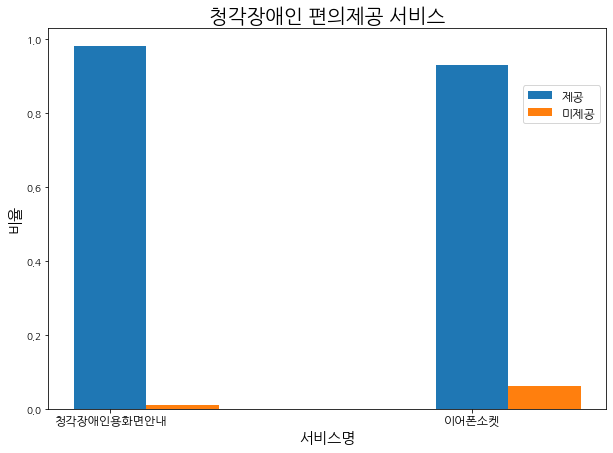

In [ ]:
plt.figure(figsize=(10,7))
service = ['청각장애인용화면안내','이어폰소켓']
index = np.arange(len(service))
provided = [0.98,0.93]
not_provided = [0.01,0.06]
bar_width = 0.2
plt.bar(index,provided,bar_width,label='제공')
plt.bar(index+bar_width,not_provided,bar_width,label='미제공')
plt.title("청각장애인 편의제공 서비스",fontdict={'fontsize':20})
plt.xticks(index,service)
plt.xticks(fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(0.84,0.8),prop={'size':12})
plt.xlabel('서비스명',fontsize=15)
plt.ylabel('비율',fontsize=15)

In [ ]:
print(df_inst.query('휠체어사용자조작=="가능"').shape[0] / df_inst.shape[0])
print(df_inst.query('휠체어사용자조작=="불가능"').shape[0] / df_inst.shape[0])

0.9367635506677141
0.06323644933228594


Text(0, 0.5, '비율')

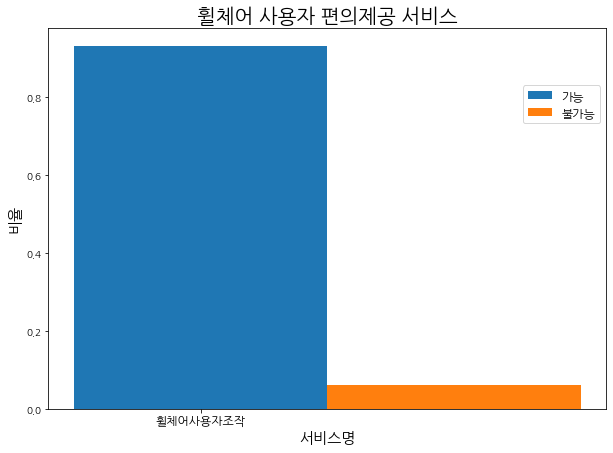

In [ ]:
plt.figure(figsize=(10,7))
service = ['휠체어사용자조작']
index = np.arange(len(service))
provided = 0.93
not_provided = 0.06
bar_width = 0.2
plt.bar(index,provided,bar_width,label='가능')
plt.bar(index+bar_width,not_provided,bar_width,label='불가능')
plt.title("휠체어 사용자 편의제공 서비스",fontdict={'fontsize':20})
plt.xticks(index,service)
plt.xticks(fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(0.84,0.8),prop={'size':12})
plt.xlabel('서비스명',fontsize=15)
plt.ylabel('비율',fontsize=15)

- 대부분의 무인민원발급기에서 시,청각 장애인, 휠체어 사용자들을 위한 편의서비스들이 제공되고 있다.
- 시각장애인을 위한 서비스 중 촉각(점자)모니터 서비스의 경우 미제공율이 높은데 추가 분석 시 키패드, 음성안내, 점자라벨, 화면확대기능 등 다른 서비스에 비해 많은 기능을 탑재하고있어서 촉각모니터의 필요성 감소로 분석 

In [ ]:
df_inst.groupby('설치장소위치')['문서발급횟수'].mean()

설치장소위치
경찰서        73.272727
공항         63.923077
구민회관       68.100000
기타         68.158537
대학(교)      66.483871
등기소        72.782609
마트         65.225000
문화복지센터     70.282051
백화점        64.666667
법원         74.692308
병원         72.045455
보건소        73.343750
세무서        72.208696
쇼핑몰        65.545455
시군구        73.978474
시도         74.000000
아파트        64.952381
역          67.980769
우체국        69.000000
은행         68.442623
읍면동        75.090942
중앙행정기관     72.533333
지하철        66.993631
차량등록사업소    73.000000
터미널        59.349206
Name: 문서발급횟수, dtype: float64

Text(0.5, 1.0, '무인민원발급기 설치장소 위치')

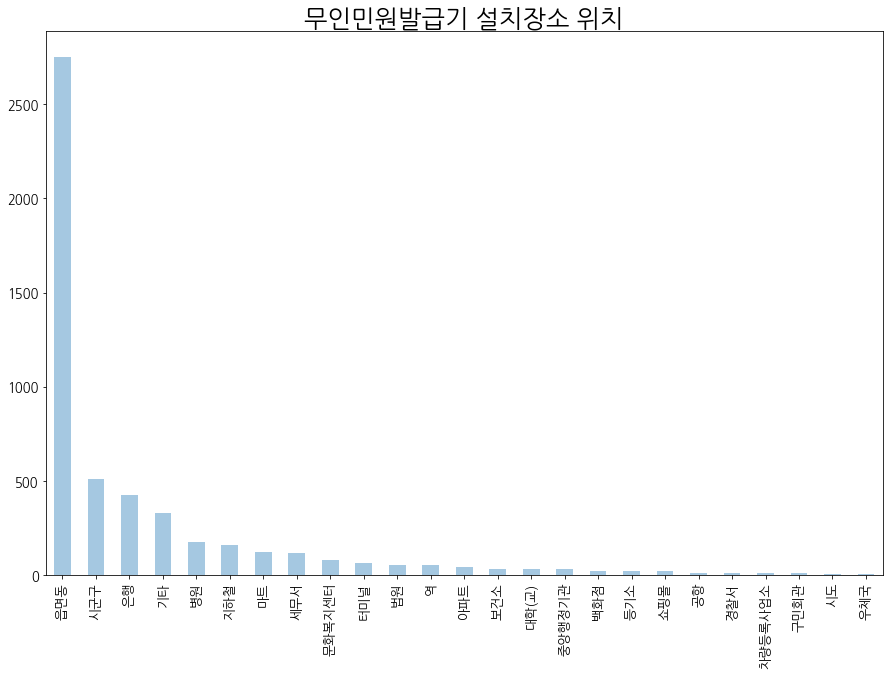

In [ ]:
plt.figure(figsize=(15,10))
df_inst['설치장소위치'].value_counts().plot(kind='bar',fontsize=13,alpha=0.4);
plt.title("무인민원발급기 설치장소 위치",fontdict={'fontsize':25})

In [ ]:
df_inst.loc[df_inst['설치장소위치']=='우체국']

,Unnamed: 0,관리번호,관리기관명,발급기명,설치장소주소,설치장소상세위치,장애인편의발급기형태,시각장애인용키패드,시각장애인용음성안내,청각장애인용화면안내,...,휠체어사용자조작,설치장소위치,문서발급횟수,갱신 연도,갱신 월,갱신 일,평일운영시작_hour,평일운영시작_min,평일운영종료_hour,평일운영종료_min
139,139,424,서울특별시 동대문구,동대문우체국,"서울특별시 동대문구 천호대로 4(신설동, 동대문우체국)",지하철2호선 10번출구로 나와 동대문우체국 1층 정문 정면에 위치,일반(장애인 편의기능 일부 포함),제공,제공,제공,...,가능,우체국,73,2022,8,21,8,0,18,0
911,911,508,부산광역시 기장군,정관읍(부산모전우체국),부산광역시 기장군 정관읍 모전1길 6-3[부산광역시 기장군 정관읍 모전리739번지 4호],부산모전우체국 365코너 내,일반(장애인 편의기능 일부 포함),제공,제공,제공,...,가능,우체국,65,2022,8,26,7,0,23,30
1207,1207,503,인천광역시 서구,가좌2동 우체국,인천광역시 서구 원적로96번길 27(가좌동),가좌2동우체국 ATM 창구 옆 외부부스,일반(장애인 편의기능 일부 포함),미제공,제공,제공,...,불가능,우체국,64,2022,8,21,8,0,22,0
1503,1503,401,대전광역시 대덕구,목상동 대덕우체국,"대전광역시 대덕구 문평동로 16, 대전대덕우체국 (문평동)",대덕우체국 현관 입구,일반(장애인 편의기능 일부 포함),제공,제공,제공,...,가능,우체국,64,2021,9,4,9,0,23,0
2719,2719,510,강원도 영월군,영월우체국,"강원도 영월군 영월읍 단종로33번길 20, 영월우체국 365",영월우체국365코너 실내,장애인겸용,제공,제공,제공,...,가능,우체국,66,2022,7,21,0,0,24,0
3366,3366,403,전라북도 정읍시,정읍우체국,전라북도 정읍시 중앙로 119(수성동),민원실내,장애인겸용,제공,제공,제공,...,가능,우체국,76,2022,8,3,9,0,18,0
3654,3654,502,전라남도 화순군,화순우체국,전라남도 화순군 화순읍 중앙로 85,화순우체국 내 1층,장애인겸용,제공,제공,제공,...,가능,우체국,75,2022,8,19,8,30,18,0


In [ ]:
df_inst['문서발급횟수'].unique()

array([76, 75, 65, 73, 63, 68, 74, 72, 64,  2, 70, 66, 62, 57,  1, 56, 61,
       67, 71, 69, 58, 52, 20, 17, 51, 55, 54,  5])

In [ ]:
f = df_inst.loc[df_inst['문서발급횟수']<=20]
f

,Unnamed: 0,관리번호,관리기관명,발급기명,설치장소주소,설치장소상세위치,장애인편의발급기형태,시각장애인용키패드,시각장애인용음성안내,청각장애인용화면안내,...,휠체어사용자조작,설치장소위치,문서발급횟수,갱신 연도,갱신 월,갱신 일,평일운영시작_hour,평일운영시작_min,평일운영종료_hour,평일운영종료_min
154,154,401,서울특별시 중랑구,중랑구청부동산정보과,서울특별시 중랑구 봉화산로 179(신내동),구청사 2층 부동산정보과 내,장애인겸용,제공,제공,제공,...,가능,시군구,2,2020,10,14,8,30,18,30
206,206,407,서울특별시 강북구,강북구청 민원실,서울특별시 강북구 도봉로89길 13(수유동)[서울특별시 강북구 수유동 192번지 59호],부동산정보과 앞 로비,일반(장애인 편의기능 일부 포함),미제공,미제공,미제공,...,가능,시군구,1,2022,8,12,9,0,18,0
261,261,501,서울특별시 노원구,부동산등기부등본,서울특별시 노원구 노해로 437(상계동),노원구청 1층 정문현관입구 왼쪽,일반,미제공,미제공,미제공,...,불가능,시군구,1,2022,7,20,9,0,18,0
436,436,509,서울특별시 구로구,구로구청(부동산정보과),서울특별시 구로구 가마산로 245(구로동),1층 부동산정보과 내,장애인겸용,제공,제공,제공,...,가능,시군구,2,2022,7,20,9,0,18,0
678,678,404,서울특별시 강동구,강동구청 부동산정보과(등기부전용),서울특별시 강동구 성내로 25(성내동)[서울특별시 강동구 성내동 540번지 강동구청],강동구청 본관 1층 로비,일반(장애인 편의기능 일부 포함),제공,미제공,제공,...,가능,시군구,1,2022,7,23,9,0,18,0
703,703,503,부산광역시 중구,부산항연안여객터미널,부산광역시 중구 충장대로 24(중앙동4가),부산항 연안여객터미널 1층 대합실,일반,미제공,미제공,미제공,...,불가능,터미널,2,2022,7,27,9,0,20,0
1065,1065,552,인천광역시 중구,IFEZ무인발급2 KIOSK,"인천광역시 중구 마시란로 308-13(남북동, 용유동주민센터)[인천광역시 중구 남북...",용유동 행정복지센터,일반,미제공,미제공,미제공,...,불가능,읍면동,20,2019,4,9,9,0,18,0
1066,1066,553,인천광역시 중구,IFEZ무인발급3 KIOSK,"인천광역시 중구 흰바위로27번길 10(운서동, 운서동주민센터)[인천광역시 중구 운서...",운서동 행정복지센터,일반,미제공,미제공,미제공,...,불가능,기타,20,2019,4,9,9,0,18,0
1067,1067,554,인천광역시 중구,IFEZ무인발급4 KIOSK,"인천광역시 중구 신포로27번길 80(관동1가, 중구청)[인천광역시 중구 관동1가 9...",인천중구청 민원실,일반,미제공,미제공,미제공,...,불가능,시군구,20,2019,4,9,9,0,18,0
1068,1068,555,인천광역시 중구,IFEZ무인발급5 KIOSK,인천광역시 연수구 갯벌로 12(송도동)[인천광역시 연수구 송도동 7번지 50호 ] ...,인천대학교 미추홀캠퍼스 별관B동,일반,미제공,미제공,미제공,...,불가능,기타,17,2019,4,9,9,0,18,0


Text(0.5, 1.0, '문서발행횟수가 낮은 설치위치')

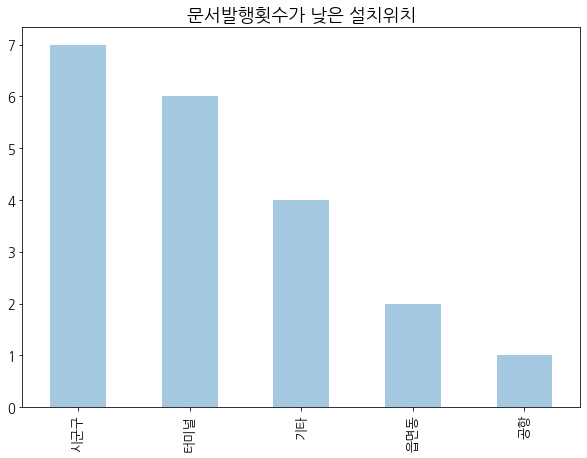

In [ ]:
plt.figure(figsize=(10,7))
f['설치장소위치'].value_counts().plot(kind='bar',fontsize=13,alpha=0.4);
plt.title("문서발행횟수가 낮은 설치위치",fontdict={'fontsize':18})

In [ ]:
f.loc[:,['설치장소상세위치','설치장소위치','문서발급횟수','평일운영시작_hour','평일운영종료_hour']]

,설치장소상세위치,설치장소위치,문서발급횟수,평일운영시작_hour,평일운영종료_hour
154,구청사 2층 부동산정보과 내,시군구,2,8,18
206,부동산정보과 앞 로비,시군구,1,9,18
261,노원구청 1층 정문현관입구 왼쪽,시군구,1,9,18
436,1층 부동산정보과 내,시군구,2,9,18
678,강동구청 본관 1층 로비,시군구,1,9,18
703,부산항 연안여객터미널 1층 대합실,터미널,2,9,20
1065,용유동 행정복지센터,읍면동,20,9,18
1066,운서동 행정복지센터,기타,20,9,18
1067,인천중구청 민원실,시군구,20,9,18
1068,인천대학교 미추홀캠퍼스 별관B동,기타,17,9,18


- 여객터미널, 유람선 선착장, 케이블카 정류장, 공항과 같은 휴가철이나 명절에 유동인구가 직결되는 장소나 학기에 따른 유동인구 변화가 심한 대학교는 발급기의 문서발급횟수가 현저히 낮음
- 시군구나 읍면동에 설치된 발급기의 경우 유동인구에 영향이 적고 접근성에 높지만 다른 주민센터에 설치된 발급기와 달리 평일 운영시간이 대부분 18시에 종료되며 24시 운영이 거의 없음 

In [ ]:
print(df_inst.문서발급횟수.mean())
print(df_inst.query('문서발급횟수>=72').shape[0] / df_inst.shape[0])
print(df_inst.query('문서발급횟수<72').shape[0] / df_inst.shape[0])

72.65396700706991
0.7584446190102121
0.2415553809897879


In [ ]:
df_inst['제거여부']  = df_inst['문서발급횟수'].map(lambda x : 1 if x >= 72 else 0)

In [ ]:
df_inst.drop(['Unnamed: 0'],axis=1,inplace=True)

---
## 모델선정

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [ ]:
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 9.0 MB/s 
     |████████████████████████████████| 133 kB 51.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7f9e34eabe9e765e349920c4682cd778be629af697b7d9c699089e59ce3babe1
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 227 kB/s 
     |████████████████████████████████| 13.1 MB 42.0 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=fd82877754fb76aa35765e140230d6cb99adcbf059f4142b60623650aa52bee6
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2bc3c8f9163d76a17822555428b40fc24b59f0920778f30220ad621a23dc9fb6
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from scipy.stats.distributions import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from hyperopt import hp
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

---
### logistic regression model

In [ ]:
df_inst_cp2=df_inst.copy()

In [ ]:
df_inst_cp2.drop(['문서발급횟수'],axis=1,inplace=True)

In [ ]:
train, test = train_test_split(df_inst_cp2, test_size=0.2,  random_state=42)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=["number", "object"])
    labels = selected_cols.nunique()  # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist()  # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

In [ ]:
target = '제거여부'

In [ ]:
X_test, y_test = test.drop(columns=target), test[target]
X_val, y_val = val.drop(columns=target), val[target]
X_train, y_train = train.drop(columns=target), train[target]
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (3258, 16)
X_val shape:  (815, 16)
X_test shape:  (1019, 16)


In [ ]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.761 입니다


In [ ]:
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats] = scaler.transform(X_val[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
ohe = OneHotEncoder()

X_train_ohe = ohe.fit_transform(X_train)
X_val_ohe = ohe.transform(X_val)
X_test_ohe = ohe.transform(X_test)

In [ ]:
logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train_ohe, y_train)
y_val_pred = logistic.predict(X_val_ohe)
print('logistic train accuracy', logistic.score(X_train_ohe, y_train).round(2))
print("logistic validation accuracy: ", accuracy_score(y_val, y_val_pred).round(2))

logistic train accuracy 0.84
logistic validation accuracy:  0.84


In [ ]:
y_test_pred = logistic.predict(X_test_ohe)
print("logistic test accuracy: ", accuracy_score(y_test, y_test_pred).round(2))

logistic test accuracy:  0.84


In [ ]:
y_pred_proba = logistic.predict_proba(X_test_ohe)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Logistic Regression의 auc score : {auc.round(3)}")

Logistic Regression의 auc score : 0.887


---
### RandomForest model

In [ ]:
df_inst_cp3=df_inst.copy()

In [ ]:
df_inst_cp3.drop(['문서발급횟수'],axis=1,inplace=True)

In [ ]:
train, test = train_test_split(df_inst_cp2, test_size=0.2,  random_state=42)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=["number", "object"])
    labels = selected_cols.nunique()  # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist()  # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

In [ ]:
target = '제거여부'

In [ ]:
X_test, y_test = test.drop(columns=target), test[target]
X_val, y_val = val.drop(columns=target), val[target]
X_train, y_train = train.drop(columns=target), train[target]
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (3258, 16)
X_val shape:  (815, 16)
X_test shape:  (1019, 16)


In [ ]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.761 입니다


In [ ]:
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(max_depth=8, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)

y_val_pred_proba = pipe_rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"RandomForestClassifier의 val auc score : {auc.round(3)}")

y_test_pred_proba = pipe_rf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"RandomForestClassifier의 test auc score : {auc.round(3)}")

RandomForestClassifier의 val auc score : 0.885
RandomForestClassifier의 test auc score : 0.883


---
### XGBoosting model

In [ ]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_inst_cp=df_inst.copy()

In [ ]:
df_inst_cp.drop(['문서발급횟수'],axis=1,inplace=True)

In [ ]:
train, test = train_test_split(df_inst_cp, test_size=0.2,  random_state=42)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=["number", "object"])
    labels = selected_cols.nunique()  # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist()  # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

In [ ]:
target = '제거여부'

In [ ]:
X_test, y_test = test.drop(columns=target), test[target]
X_val, y_val = val.drop(columns=target), val[target]
X_train, y_train = train.drop(columns=target), train[target]
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (3258, 16)
X_val shape:  (815, 16)
X_test shape:  (1019, 16)


In [ ]:
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.761 입니다


In [ ]:
"""
params = {
    "simpleimputer__strategy": hp.choice("strategy", ["median", "mean"]),
    "xgbclassifier__max_depth": hp.quniform("max_depth", 2, 10, 2),
    "xgbclassifier__min_child_weight": hp.quniform("min_child_weight", 2, 10, 2),
    "xgbclassifier__colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),
}
"""

'\nparams = {\n    "simpleimputer__strategy": hp.choice("strategy", ["median", "mean"]),\n    "xgbclassifier__max_depth": hp.quniform("max_depth", 2, 10, 2),\n    "xgbclassifier__min_child_weight": hp.quniform("min_child_weight", 2, 10, 2),\n    "xgbclassifier__colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),\n}\n'

In [ ]:
"""
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
import numpy as np


def get_pipe(params):
    params["xgbclassifier__max_depth"] = int(
        params["xgbclassifier__max_depth"]
    )  # max_depth는 정수형으로 변환해 줍니다.
    pipe = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(strategy="median"),
        XGBClassifier(
            objective="binary:logistic",
            eval_metric="error",
            n_estimators=200,
            random_state=42,
            n_jobs=-1,
            learning_rate=0.15,
            use_label_encoder=False,
        ),
    )
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):
    pipe = get_pipe(params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.
    score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="roc_auc")
    avg_cv_score = np.mean(score)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=1000
)
"""

'\nfrom hyperopt import fmin, tpe, Trials, STATUS_OK\nfrom sklearn.model_selection import cross_val_score\nimport numpy as np\n\n\ndef get_pipe(params):\n    params["xgbclassifier__max_depth"] = int(\n        params["xgbclassifier__max_depth"]\n    )  # max_depth는 정수형으로 변환해 줍니다.\n    pipe = make_pipeline(\n        OrdinalEncoder(),\n        SimpleImputer(strategy="median"),\n        XGBClassifier(\n            objective="binary:logistic",\n            eval_metric="error",\n            n_estimators=200,\n            random_state=42,\n            n_jobs=-1,\n            learning_rate=0.15,\n            use_label_encoder=False,\n        ),\n    )\n    pipe = pipe.set_params(**params)\n    return pipe\n\n\ndef fit_and_eval(params):\n    pipe = get_pipe(params)  # 주어진 params로 파이프라인을 만들어 가져옵니다.\n    score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="roc_auc")\n    avg_cv_score = np.mean(score)\n    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환합니다.\n

In [ ]:
#print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
#print("최적 AUC: ", -trials.best_trial["result"]["loss"])

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        n_estimators=200,
        random_state=42,
        colsample_bytree=0.53,
        min_child_weight = 10,
        n_jobs=-1,
        max_depth=6,
        learning_rate=0.15,
    ),
)

In [ ]:
pipe.fit(X_train, y_train)

y_val_pred_proba = pipe.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_val_pred_proba)

0.8921759281767061

In [ ]:
y_test_pred_proba = pipe.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_pred_proba)

0.8895771082337318

In [ ]:
pi = pd.Series(dtype=float)

n_iter = 10  # 랜덤으로 특성을 섞어 평가 성능을 확인하는 과정을 몇 번 반복할지 결정합니다.
features = test.drop(columns=target).columns
score = pipe.score(X_test, y_test)
for feature in features:
    X_test_permed = X_test.copy()

    # 모델을 재학습하지 않고, 기존 모델에서 feature 값을 여러 번(n_iter) 섞고 검증하여 평균 성능을 확인합니다.
    scores_permutated = []
    for _ in range(n_iter):
        X_test_permed[feature] = np.random.permutation(X_test_permed[feature])
        scores_permutated.append(pipe.score(X_test_permed, y_test))
    avg_score_permutated = np.mean(scores_permutated)
    print(f"Perm {feature} :: 검증 정확도 {avg_score_permutated:.6f}")

    # permutation importance는 해당 특성을 랜덤으로 섞었을 때의 성능 하락폭으로 정의됩니다.
    pi[feature] = score - avg_score_permutated

Perm 장애인편의발급기형태 :: 검증 정확도 0.863886
Perm 시각장애인용키패드 :: 검증 정확도 0.863297
Perm 시각장애인용음성안내 :: 검증 정확도 0.861237
Perm 청각장애인용화면안내 :: 검증 정확도 0.863592
Perm 점자라벨부착 :: 검증 정확도 0.862022
Perm 이어폰소켓 :: 검증 정확도 0.861138
Perm 촉각모니터 :: 검증 정확도 0.862218
Perm 화면확대기능 :: 검증 정확도 0.863592
Perm 휠체어사용자조작 :: 검증 정확도 0.864573
Perm 설치장소위치 :: 검증 정확도 0.669382
Perm 갱신 연도 :: 검증 정확도 0.860648
Perm 갱신 월 :: 검증 정확도 0.856722
Perm 평일운영시작_hour :: 검증 정확도 0.847596
Perm 평일운영시작_min :: 검증 정확도 0.864966
Perm 평일운영종료_hour :: 검증 정확도 0.838175
Perm 평일운영종료_min :: 검증 정확도 0.862905


Text(0.5, 1.0, 'Permutation Importance')

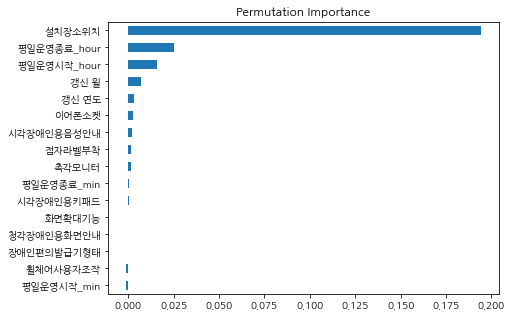

In [ ]:
plt.figure(figsize=(7,5))
pi.sort_values().plot.barh()
plt.title("Permutation Importance")

In [ ]:
preprocess_pipeline = pipe.named_steps["ordinalencoder"]
X_test_encoded = preprocess_pipeline.transform(X_test)

In [ ]:
X_val_encoded = preprocess_pipeline.transform(X_val)

In [ ]:
target_feature = "평일운영종료_hour"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f593e8a6210>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bff34510>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bff639d0>}})

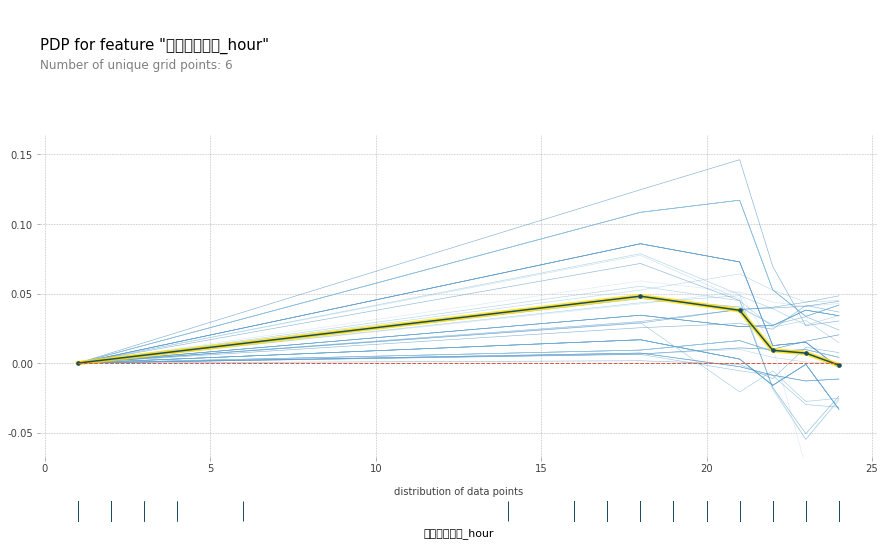

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

In [ ]:
target_feature = "평일운영시작_hour"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bfdc5dd0>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bfd834d0>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bfd349d0>}})

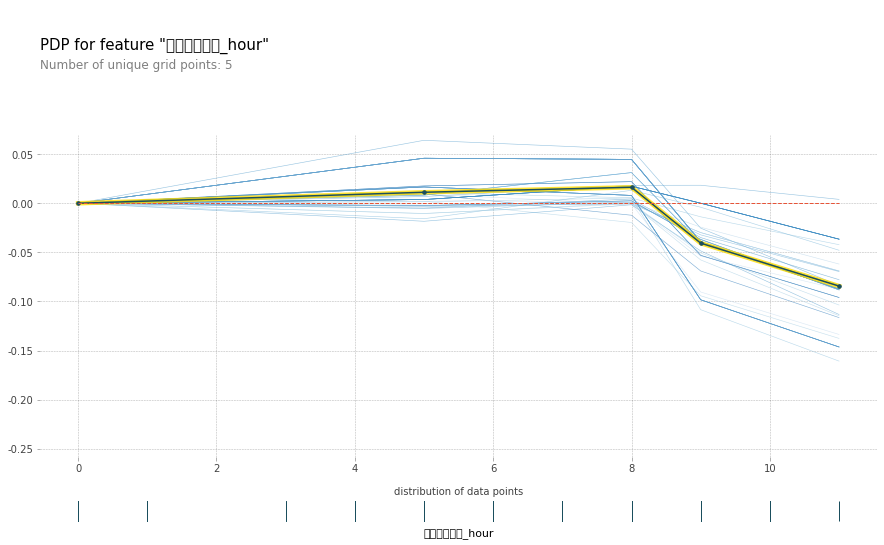

In [ ]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

In [ ]:
target_features = ["갱신 연도", "갱신 월"]

interaction = pdp_interact(
    model=pipe,
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns,
    features=target_features,
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bfc87f50>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f58bfbc8510>})

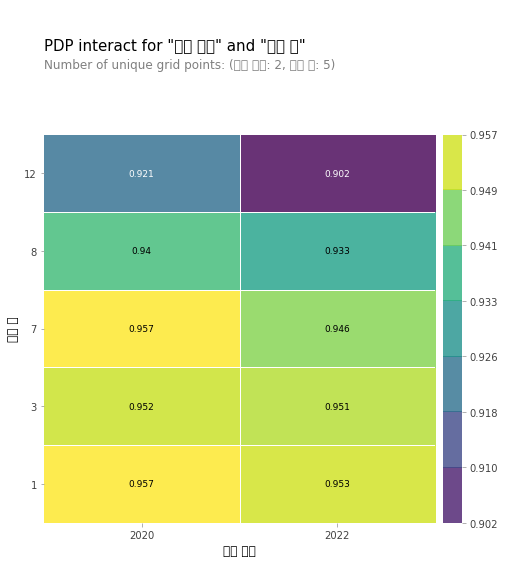

In [ ]:
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)